In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
#Doesn't look like there are missing data or n/a
#Doesn't look like there are less date in some labels
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#possible don't need the Id since wehave the index column
df.drop("Id", axis=1, inplace= True)

Let's analyse more explicityl if we have null values

In [49]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
#Trying to get an overview of the amount of data, some averages, minimus and maximums
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#Let's see what species categories there exists
#We see there is even amount of inputs for each species.
df["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

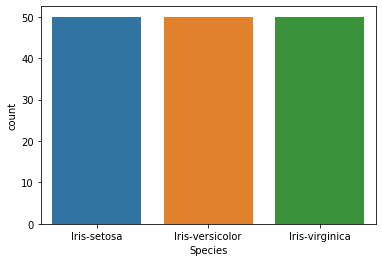

In [50]:
#this is the cell above but visualized
sns.countplot(data=df, x="Species")

In [11]:
#let's extract some means in order to see a rough summary and representation of the data per Species.
#later on we will see of this is reflected on different plots
df.groupby("Species").mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Let's explore individual features before: interestingly petal length and petal width make the Iris setosa a clear
outlier in this case, making it easier to identify from the rest of species by making a nicely visible cluster of data for this iris species. This is also visible on the
pairplot that we performed down below.

On the other hand Versicolor, lays more in the middle of the values, for example most of the sepal lenghts and sepal width for Versicolor are centered around 5.5-6.5cm, aand similar result if visible for Petals. 

Making the Virginica to outstand in among other in the area of Petel lengths and Petal widths, since the count there tens to be in the higher numbers likes 5-6.3cm and 1.7-2.5cm respectively. 

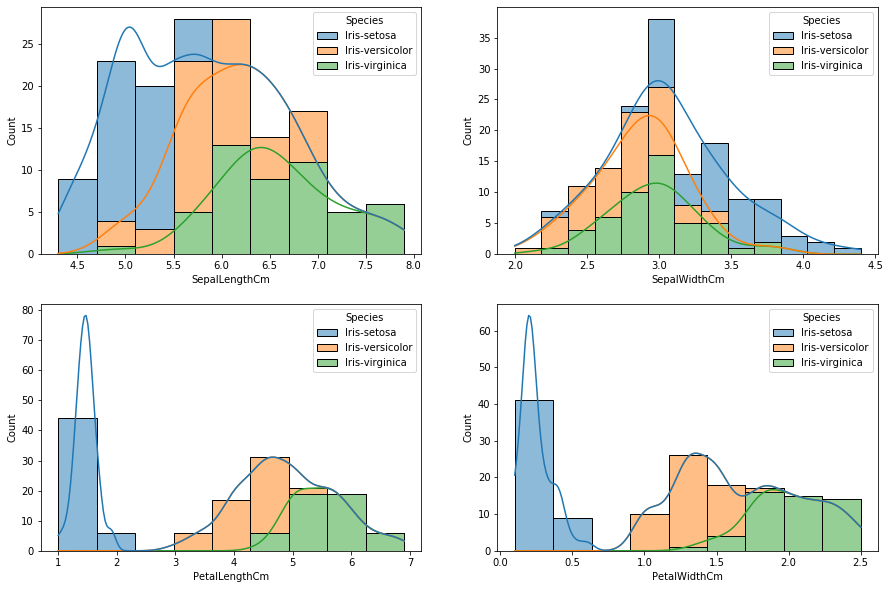

In [34]:
f, ax = plt.subplots(nrows= 2, ncols=2, figsize=(15,10))
sns.histplot(data=df, x="SepalLengthCm", hue="Species", ax=ax[0, 0],  multiple="stack", kde=True)
sns.histplot(data=df, x="SepalWidthCm", hue="Species", ax=ax[0, 1], multiple="stack", kde=True)
sns.histplot(data=df, x="PetalLengthCm", hue="Species", ax=ax[1, 0], multiple="stack", kde=True)
sns.histplot(data=df, x="PetalWidthCm", hue="Species", ax=ax[1, 1], multiple="stack", kde=True)

To see the relationship between all the variables split among the Species we will use a paitplot.
Biggest outlier is the setosa species, which forms a differentiated cluster, thi was already evident in previous plots.

If we look at the diagonals, we can see in more graphical way the representations of the distributions calculated above.

Regarding the two other species, we can suggest that overall the Versicolor lays in the middle of Setosa and Virginica pretty much in all the measures except for sepal length and sepal width where a lot of data is similar for the 3 species. Overall 3 well definded clusters are visible in most of the areas however, and petal lengths and petal widths make it much easier to classify the species: as visible from the pairplot, the means above and even in the histplots.

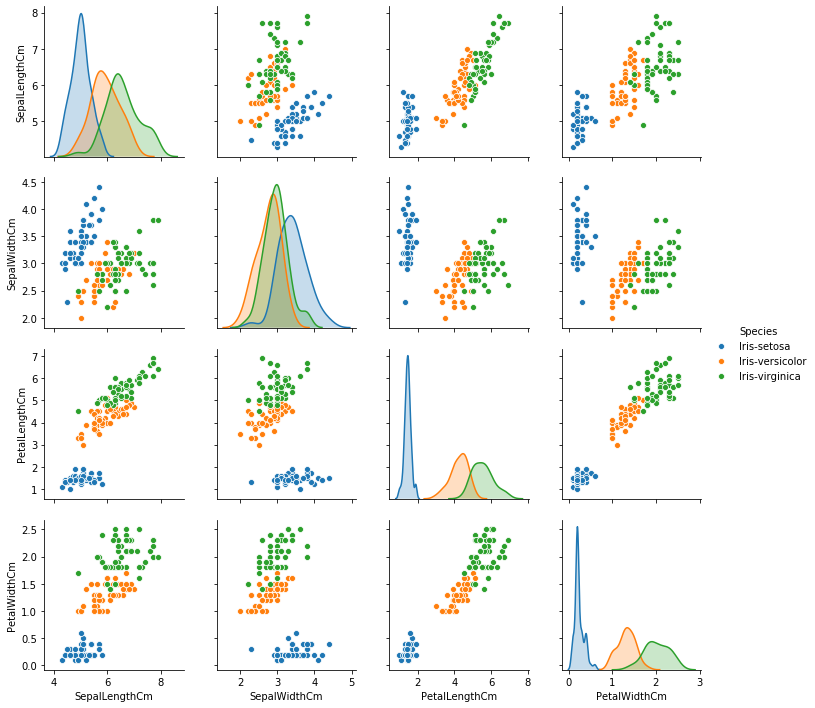

In [66]:
sns.pairplot(data=df, hue="Species")

Let's explore some individual features through boxplots in order to see some outliers and also the quartiles,
and have an idea of how the data is spread for each feature. Gives some more details than the KDE in
the pairplot above.

We notice some outliers, but not many, setosa is still well separated. 


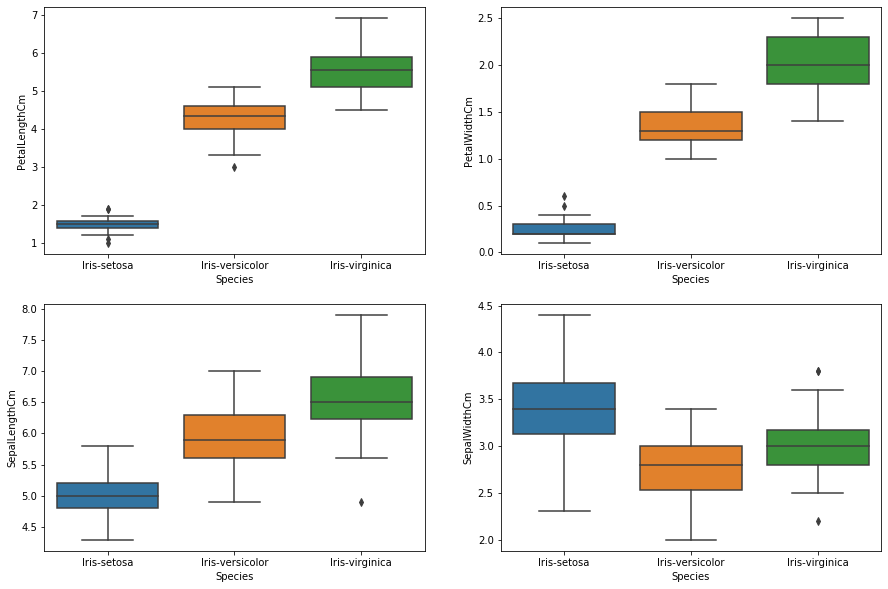

In [114]:
#FUNCTIONAL WAY OF CREATING PLOT FIGURES
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1) #arguments indicate: two rows and two columns, and subplot we are referring to
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)

Let's explore how the dimensions correlate with each other.  

In summery higher petal length is related to a higher petal width, as well as higher sepal length. On the other hand, one of the least correlated fields is the sepal width and petal length.

In [203]:
corr_data=df[df.columns[0:4]].corr()

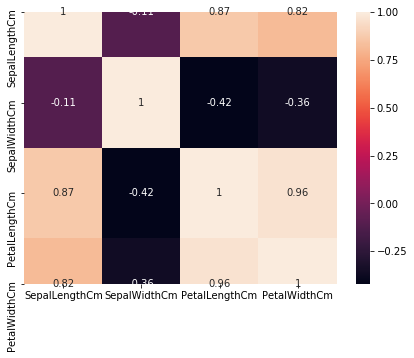

In [208]:
plt.figure(figsize=(7,5)) 
sns.heatmap(corr_data, annot=True)

A classification machine learning model could be applied in the future.